In [58]:
# load the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0 / 255)

training_set = train_datagen.flow_from_directory(
    "./dataset/training_set", target_size=(50, 50), batch_size=32, class_mode="binary"
)

Found 8000 images belonging to 2 classes.


In [59]:
# set up the cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
# 第一个卷积层
# 二维卷积层，32个过滤器（卷积核），每个过滤器的大小为3x3
# 输入数据是高50，宽50，3个颜色（RGB）通道的图像
# 激活函数是：ReLU（Rectified Linear Unit）
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3), activation="relu"))

# 第一个池化层
# 最大池化层，用于减小特征图的尺寸，同时保留最重要的特征。池化窗口的大小为2x2
model.add(MaxPool2D(pool_size=(2, 2)))

# 第二个卷积层
# 第一个卷积层类似，但不需要再指定输入形状，因为它将接受前一个层的输出作为输入
model.add(Conv2D(32, (3, 3), activation="relu"))

# 第二个池化层，进一步减少特征图的尺寸
model.add(MaxPool2D(pool_size=(2, 2)))

# 展平层（flattening layer）
# 将多维的特征图转换为一维的数组，以便可以连接到全连接层。
model.add(Flatten())

# 第一个全连接层（FC layer）
# 有128个神经元，激活函数式 ReLU
model.add(Dense(units=128, activation="relu"))

# 第二个全连接层，也是输出层
# 单一神经元的全连接层，使用sigmoid激活函数，用于二分类问题的输出
model.add(Dense(units=1, activation="sigmoid"))

In [60]:
# configure the model
# 二分类问题配置模型的学习参数
# 使用"Adam"优化器、二分类交叉熵作为损失函数，并监控分类准确率。
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [61]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       495,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,017 (1.93 MB)

 Trainable params: 506,017 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# train the model
# model.fit_generator(training_set, epochs=20)
model.fit(training_set, epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.5737 - loss: 0.6805
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.6986 - loss: 0.5772
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.7503 - loss: 0.5118
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.7838 - loss: 0.4515
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7977 - loss: 0.4259
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8433 - loss: 0.3499
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.8598 - loss: 0.3183
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9049 - loss: 0.2372
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9292 - loss: 0.1858
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9598 - loss: 0.1212
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9721 - loss: 0.0908
Epoch 12/20
250/250 ━━━━━━━━━━

In [63]:
# accuracy on the training data
# 返回一个包含损失值和准确率的列表
accuracy_train = model.evaluate(training_set)
print(accuracy_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 1.0000 - loss: 5.4817e-04
[0.0005520170088857412, 1.0]


In [64]:
# accuracy on the test data

# 加载测试集
# 从指定目录加载图像，并将其大小调整为50x50像素。
# 按批次生成图像，每个批次包含32张图像。
# class_mode设置为"binary"，期望目录中只有两个类别的图像，并且标签将被编码为0和1。
test_set = train_datagen.flow_from_directory(
    "./dataset/test_set", target_size=(50, 50), batch_size=32, class_mode="binary"
)

# 损失值和准确率
accuracy_test = model.evaluate(test_set)
print(accuracy_test)

Found 2000 images belonging to 2 classes.
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7695 - loss: 1.4513
[1.5055311918258667, 0.7574999928474426]


In [65]:
# load single dog image to predict
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 加载图像，并将其大小调整为 50x50 像素
pic_dog = "./dataset/user_data/dog.jpg"
pic_dog = load_img(pic_dog, target_size=(50, 50))

# 图像对象转换为一个形状为 (height, width, channels) 的 NumPy 数组
pic_dog = img_to_array(pic_dog)
# 归一化
pic_dog = pic_dog.astype("float32") / 255

# 将图像数组的形状从 (50, 50, 3) 改变为 (1, 50, 50, 3)。
# 模型通常期望一个批量的输入，需要将其形状修改为包含批次大小的维度。
# 批次大小为 1。
pic_dog_reshaped = pic_dog.reshape(1, 50, 50, 3)


result_dog = (model.predict(pic_dog_reshaped) > 0.5).astype("int32")
print(result_dog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[1]]


In [66]:
print("--vv-- normalized dog pic data --vv--")
print(pic_dog)

--vv-- normalized dog pic data --vv--
[[[0.5882353  0.7254902  0.46666667]
  [0.60784316 0.7294118  0.46666667]
  [0.61960787 0.7411765  0.47843137]
  ...
  [0.6        0.7372549  0.47843137]
  [0.5921569  0.7294118  0.47843137]
  [0.5686275  0.7058824  0.44705883]]

 [[0.59607846 0.73333335 0.4745098 ]
  [0.59607846 0.73333335 0.46666667]
  [0.59607846 0.73333335 0.46666667]
  ...
  [0.5882353  0.7372549  0.4509804 ]
  [0.58431375 0.73333335 0.44705883]
  [0.5803922  0.7294118  0.43529412]]

 [[0.60784316 0.74509805 0.47843137]
  [0.60784316 0.74509805 0.4862745 ]
  [0.6313726  0.7490196  0.49803922]
  ...
  [0.5921569  0.73333335 0.4509804 ]
  [0.6        0.7411765  0.45882353]
  [0.5882353  0.7372549  0.4509804 ]]

 ...

 [[0.32941177 0.47058824 0.2901961 ]
  [0.20392157 0.3764706  0.13725491]
  [0.31764707 0.49019608 0.28235295]
  ...
  [0.41960785 0.59607846 0.42745098]
  [0.07843138 0.22745098 0.07450981]
  [0.30588236 0.44705883 0.26666668]]

 [[0.4117647  0.5686275  0.3647059 ]

In [67]:
print("--vv-- reshaped dog pic data --vv--")
print(pic_dog_reshaped)

--vv-- reshaped dog pic data --vv--
[[[[0.5882353  0.7254902  0.46666667]
   [0.60784316 0.7294118  0.46666667]
   [0.61960787 0.7411765  0.47843137]
   ...
   [0.6        0.7372549  0.47843137]
   [0.5921569  0.7294118  0.47843137]
   [0.5686275  0.7058824  0.44705883]]

  [[0.59607846 0.73333335 0.4745098 ]
   [0.59607846 0.73333335 0.46666667]
   [0.59607846 0.73333335 0.46666667]
   ...
   [0.5882353  0.7372549  0.4509804 ]
   [0.58431375 0.73333335 0.44705883]
   [0.5803922  0.7294118  0.43529412]]

  [[0.60784316 0.74509805 0.47843137]
   [0.60784316 0.74509805 0.4862745 ]
   [0.6313726  0.7490196  0.49803922]
   ...
   [0.5921569  0.73333335 0.4509804 ]
   [0.6        0.7411765  0.45882353]
   [0.5882353  0.7372549  0.4509804 ]]

  ...

  [[0.32941177 0.47058824 0.2901961 ]
   [0.20392157 0.3764706  0.13725491]
   [0.31764707 0.49019608 0.28235295]
   ...
   [0.41960785 0.59607846 0.42745098]
   [0.07843138 0.22745098 0.07450981]
   [0.30588236 0.44705883 0.26666668]]

  [[0.411

In [68]:
# load single cat image to predict

pic_cat = "./dataset/user_data/cat.jpg"
pic_cat = load_img(pic_cat, target_size=(50, 50))
pic_cat = img_to_array(pic_cat)
pic_cat = pic_cat.astype("float32") / 255
pic_cat = pic_cat.reshape(1, 50, 50, 3)
result_cat = (model.predict(pic_cat) > 0.5).astype("int32")
print(result_cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


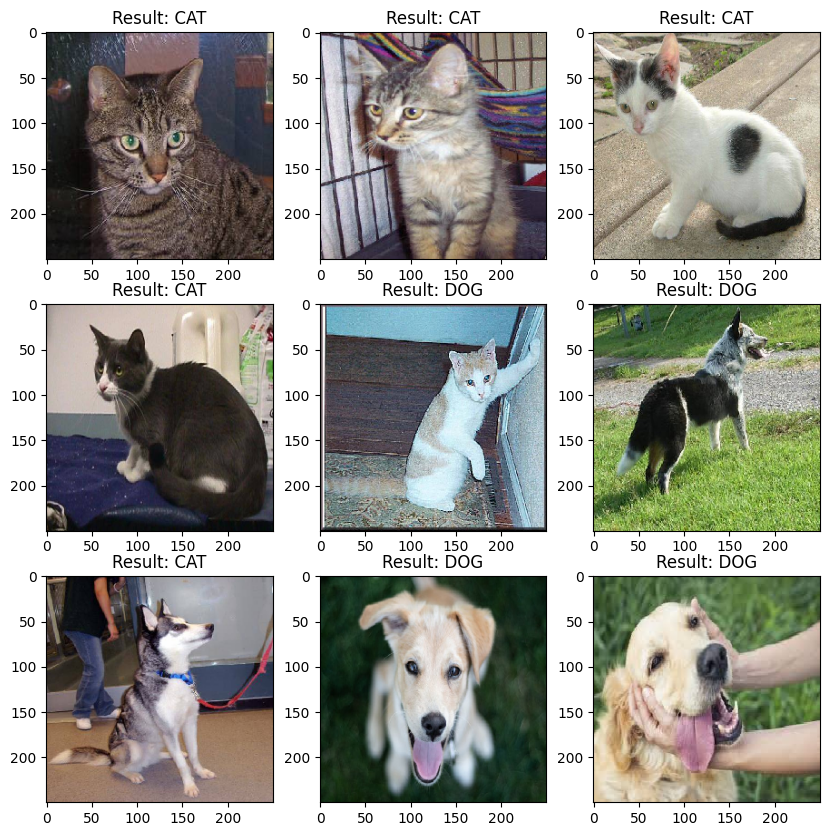

In [69]:
# predict multiple images
import matplotlib as mlp

from matplotlib import pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

a = [i for i in range(1, 10)]
fig = plt.figure(figsize=(10, 10))
for i in a:
    img_name = "./dataset/user_data/" + str(i) + ".jpg"
    img_ori = load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype("float32") / 255
    img = img.reshape(1, 50, 50, 3)
    result = (model.predict(img) > 0.5).astype("int32")

    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3, 3, i)
    plt.imshow(img_ori)
    plt.title("Result: DOG" if result[0][0] == 1 else "Result: CAT")
plt.show()